<a href="https://colab.research.google.com/github/xknobm00/MPA-MLF/blob/main/cv_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

## Exercise 1.1

write a code that prints the following pattern.

In [15]:
rows = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

for i in rows:
    print("X " * i)

X 
X X 
X X X 
X X X X 
X X X X X 
X X X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5


In [16]:
input_str = "n45as29@#8ss6"

suma = 0

for char in input_str:
    if char.isdigit():
        suma += int(char)

print(suma)

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only 0 and 1). Avoid using the bin() function or any other pythons default functions

In [18]:
def int_to_binary(n):
    if n == 0:
        return "0"

    binary_str = ""

    while n > 0:
        binary_str = str(n % 2) + binary_str
        n //= 2

    return binary_str

# Příklad použití
cislo = 9
print(int_to_binary(cislo))


1001


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21

Your task is to implement a function fibonacci that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

In [20]:
def fibonacci(upper_threshold: int) -> list:
    if upper_threshold <= 0:
        return []

    fib_list = [0, 1]
    while True:
        next_fib = fib_list[-1] + fib_list[-2]
        if next_fib >= upper_threshold:
            break
        fib_list.append(next_fib)

    return fib_list

# Příklad použití
print(fibonacci(10))

[0, 1, 1, 2, 3, 5, 8]


## Exercise 1.5. - Rock, Paper, Scissors game:

basic
Rock, Paper, Scissors is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function rock_paper_scissors.

Notes:

This implementation uses the random library to enable the computer to make a random choice.
Keyword Input may be helpful. Check it
After the function is run, the program will ask you about your movement, which you type in
The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
This script plays one round of the game.
The script prints the result ('You lose', 'You win', 'It is a tie')

In [21]:
import random

def rock_paper_scissors() -> None:
    choices = ["rock", "paper", "scissors"]
    computer_choice = random.choice(choices)

    user_choice = input("Choose Rock, Paper, or Scissors: ").strip().lower()

    if user_choice not in choices:
        print("Invalid choice.")
        return

    print(f"Computer chose: {computer_choice}")

    if user_choice == computer_choice:
        print("It is a tie")
    elif (user_choice == "rock" and computer_choice == "scissors") or \
         (user_choice == "scissors" and computer_choice == "paper") or \
         (user_choice == "paper" and computer_choice == "rock"):
        print("You win")
    else:
        print("You lose")

rock_paper_scissors()

Choose Rock, Paper, or Scissors: rock
Computer chose: scissors
You win


# Exercise 2

# Exercise 2.1

In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

Implement the function create_array_nxn that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
Using a loop-based approach (for-loop, while-loop), implement the function apply_threshold_loop that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
Implement function apply_threshold_vectorized that performs the same operation as apply_threshold_loop, but without loops, using NumPy vectorized operations
Implement function compare_performance that compares the execution time of functions apply_threshold_vectorized and apply_threshold_loop with time library and print the results

Additional Notes:

Ensure n is a positive integer (n > 0).
Use the time library to measure execution times for performance comparison.
The function compare_performance(n, threshold) should:
Generate an n×n array.
Apply both loop-based and vectorized thresholding.
Print execution times.

In [22]:
import numpy as np
import time

def create_array_nxn(n: int) -> np.ndarray:
    if n <= 0:
        raise ValueError("n musí být kladné číslo")
    return np.arange(n**2 - 1, -1, -1).reshape(n, n)

def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    rows, cols = result.shape
    for i in range(rows):
        for j in range(cols):
            if result[i, j] < threshold:
                result[i, j] = 0
    return result

def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    return np.where(arr < threshold, 0, arr)

def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    start_time = time.time()
    apply_threshold_loop(arr, threshold)
    loop_time = time.time() - start_time

    start_time = time.time()
    apply_threshold_vectorized(arr, threshold)
    vectorized_time = time.time() - start_time

    print(f"Výkon při n={n}, threshold={threshold}:")
    print(f"Smyčka: {loop_time:.6f} s")
    print(f"Vektorizace: {vectorized_time:.6f} s")

compare_performance(100, 5000)


Výkon při n=100, threshold=5000:
Smyčka: 0.002646 s
Vektorizace: 0.003609 s


## Exercise 2.2 - Digi display

basic
The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer

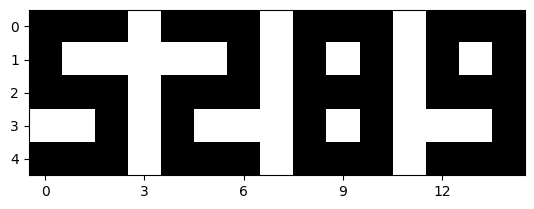

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def show_in_digi(input_integer: int) -> None:
    numbs = {
        "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
        "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]),
        "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]),
        "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
        "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
        "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
        "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]),
    }

    digits = list(str(input_integer))

    separator = np.zeros((5, 1), dtype=int)

    result = numbs[digits[0]]
    for digit in digits[1:]:
        result = np.hstack((result, separator, numbs[digit]))

    plt.imshow(result, cmap="gray_r")
    plt.axis('on')  # Zapnutí os
    plt.xticks(np.arange(0, result.shape[1], 3))
    plt.yticks(np.arange(0, result.shape[0], 1))
    plt.show()

show_in_digi(5289)



# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of pandas library. Use california_housing_dataset you can find in google colab to do following operations:

check what dataset.describe() does
display all rows where total_bedrooms column is bigger than 310
drop also first and last row
save a mean of values in households columns to variable, using matplotlib display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is
check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset
display lat and long into plot, lat would be on x axis and long on y axis
choose two arbitrary columns and normalize all values inside using min-max normalization:
Create a Correlation Matrix from all columns

         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.000000   273.00000       2.5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
...,...,...,...,...,...,...,...,...,...
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
...,...,...,...,...,...,...,...,...,...
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


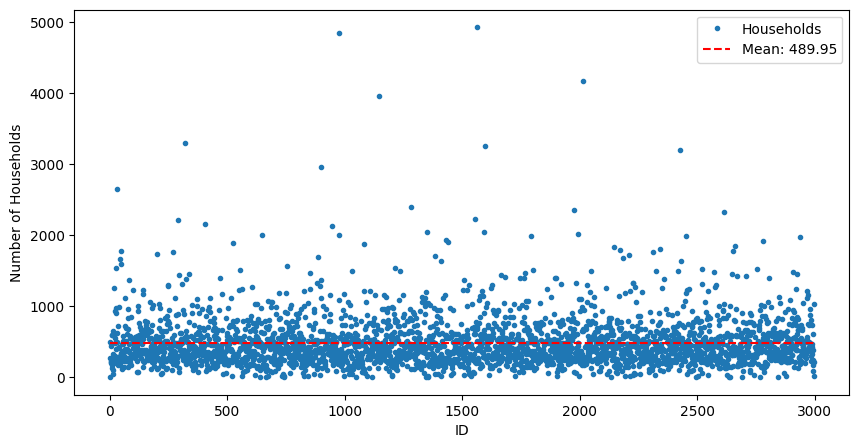

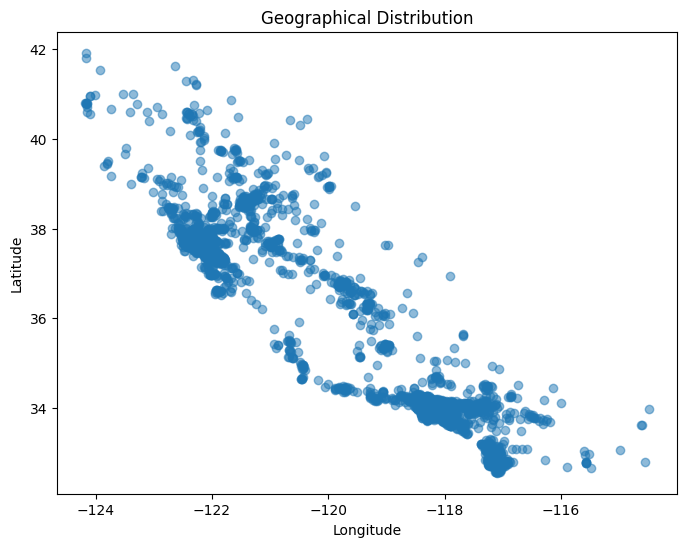

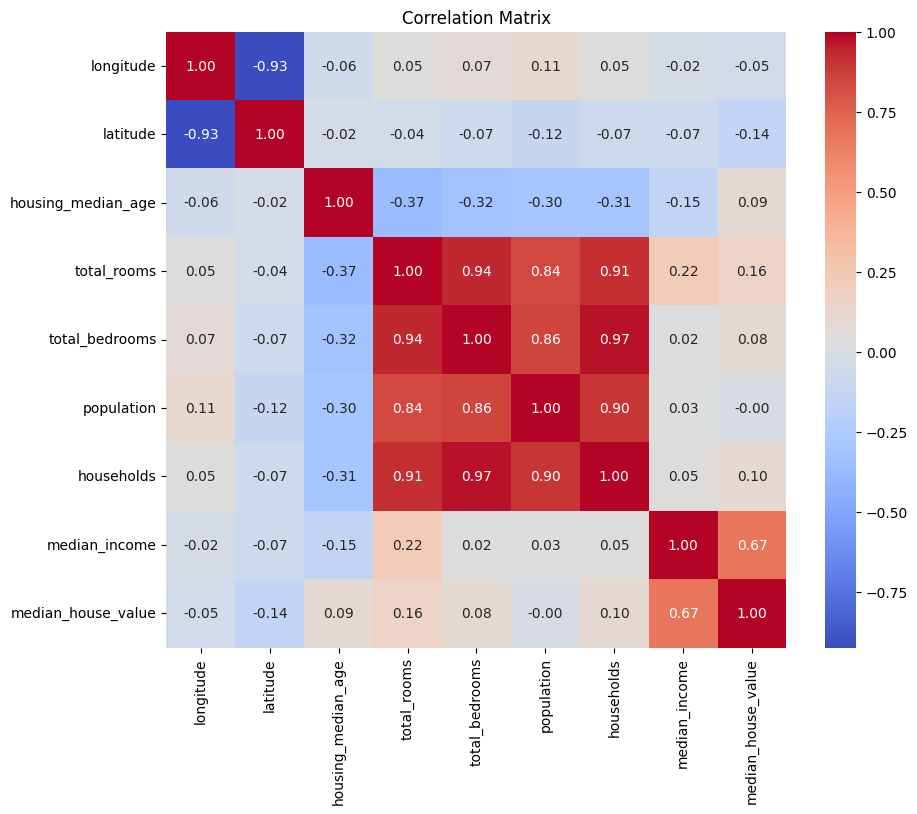

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('sample_data/california_housing_test.csv')

print(dataset.describe())

result_rooms = dataset[dataset['total_rooms'] > 310]
display(result_rooms)

dataset = dataset.iloc[1:-1]
display(dataset)

mean_households = dataset['households'].mean()

plt.figure(figsize=(10, 5))
plt.plot(dataset['households'], '.', label='Households')
plt.hlines(mean_households, xmin=0, xmax=len(dataset), color='r', linestyle='--', label=f'Mean: {mean_households:.2f}')
plt.xlabel('ID')
plt.ylabel('Number of Households')
plt.legend()
plt.show()

if dataset.isnull().values.any():
    dataset = dataset.fillna(dataset.mean())

plt.figure(figsize=(8, 6))
plt.scatter(dataset['longitude'], dataset['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()

scaler = MinMaxScaler()
dataset[['median_income', 'total_rooms']] = scaler.fit_transform(dataset[['median_income', 'total_rooms']])

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
